In [1]:
import os
import platform
import psutil
import torch
import logging

# Configuração do logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def get_system_info():
    """Obtém informações sobre o sistema e as bibliotecas relevantes."""
    system_info = {}
    try:
        system_info["Sistema Operacional"] = f"{platform.system()} {platform.release()}"
        system_info["Processador"] = platform.processor()
        system_info["Memória RAM Total"] = f"{psutil.virtual_memory().total / (1024**3):.2f} GB"

        if torch.cuda.is_available():
            system_info["CUDA Disponível"] = "Sim"
            system_info["Número de GPUs"] = torch.cuda.device_count()
            for i in range(torch.cuda.device_count()):
                system_info[f"GPU {i}"] = torch.cuda.get_device_name(i)
        else:
            system_info["CUDA Disponível"] = "Não"

    except Exception as e:
        logging.error(f"Erro ao obter informações do sistema: {e}")

    return system_info

def check_library(lib_name):
    """Verifica se uma biblioteca está instalada e funcionando corretamente."""
    try:
        # Tentar importar a biblioteca
        __import__(lib_name)
        return True
    except ImportError:
        logging.error(f"A biblioteca '{lib_name}' não está instalada.")
        return False
    except Exception as e:
        logging.error(f"Erro ao verificar a biblioteca '{lib_name}': {e}")
        return False

def check_cuda_path():
    """Verifica se a variável de ambiente CUDA_PATH está definida corretamente."""
    cuda_path = os.environ.get('CUDA_PATH')
    if cuda_path is None or not os.path.exists(cuda_path):
        logging.error("A variável de ambiente CUDA_PATH não está definida ou o caminho é inválido.")
        return False
    else:
        logging.info(f"CUDA_PATH: {cuda_path}")
        return True

In [2]:
!pip show cupy

Name: cupy
Version: 12.3.0
Summary: CuPy: NumPy & SciPy for GPU
Home-page: https://cupy.dev/
Author: Seiya Tokui
Author-email: tokui@preferred.jp
License: MIT License
Location: c:\users\marcos.aires\.conda\envs\python38-pytorch\lib\site-packages
Requires: fastrlock, numpy
Required-by: 


In [3]:
!pip show torch

Name: torch
Version: 1.12.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\marcos.aires\appdata\roaming\python\python38\site-packages
Requires: typing-extensions
Required-by: pytorch-lightning, torchmetrics


In [4]:
# import cupy

In [5]:
# Obter informações do sistema
system_info = get_system_info()
for key, value in system_info.items():
    print(f"{key}: {value}")

# Verificar bibliotecas
if not check_library('networkx'):
    print("Instale a biblioteca NetworkX: pip install networkx")
if not check_library('numpy'):
    print("Instale a biblioteca NumPy: pip install numpy")
if not check_library('cupy'):
    print("Instale a biblioteca CuPy: pip install cupy")    
# ... (verificar outras bibliotecas)

# Verificar CUDA_PATH (se necessário)
if system_info.get("CUDA Disponível") == "Sim":
    check_cuda_path()

Sistema Operacional: Windows 10
Processador: Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
Memória RAM Total: 15.78 GB
CUDA Disponível: Não


2024-06-19 12:37:14,625 - ERROR - A biblioteca 'cupy' não está instalada.


Instale a biblioteca CuPy: pip install cupy


In [9]:
import cupy as cp
print(cp.cuda.runtime.getDeviceCount())  # mostra qte. GPUs disponivel

ImportError: 
================================================================
Failed to import CuPy.

If you installed CuPy via wheels (cupy-cudaXXX or cupy-rocm-X-X), make sure that the package matches with the version of CUDA or ROCm installed.

On Linux, you may need to set LD_LIBRARY_PATH environment variable depending on how you installed CUDA/ROCm.
On Windows, try setting CUDA_PATH environment variable.

Check the Installation Guide for details:
  https://docs.cupy.dev/en/latest/install.html

CUDA Path: C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4
DLL dependencies:
  KERNEL32.dll -> C:\WINDOWS\System32\KERNEL32.DLL
  MSVCP140.dll -> c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\MSVCP140.dll
  VCRUNTIME140.dll -> c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\VCRUNTIME140.dll
  VCRUNTIME140_1.dll -> c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\VCRUNTIME140_1.dll
  api-ms-win-crt-convert-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-environment-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-filesystem-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-heap-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-runtime-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  api-ms-win-crt-stdio-l1-1-0.dll -> C:\WINDOWS\System32\ucrtbase.dll
  cublas64_11.dll -> C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4\bin\cublas64_11.dll
  cudart64_110.dll -> C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4\bin\cudart64_110.dll
  cufft64_10.dll -> C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4\bin\cufft64_10.dll
  curand64_10.dll -> C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4\bin\curand64_10.dll
  cusolver64_11.dll -> C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4\bin\cusolver64_11.dll
  cusparse64_11.dll -> C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4\bin\cusparse64_11.dll
  nvcuda.dll -> not found
  nvrtc64_112_0.dll -> C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.4\bin\nvrtc64_112_0.dll
  python38.dll -> c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\python38.dll

Original error:
  ImportError: DLL load failed while importing driver: Não foi possível encontrar o módulo especificado.
================================================================


In [6]:
# !pip install hypernetx
# !pip install numba
# !pip install cupy

In [ ]:
from graph_bench_module import OverlappingCommunityDetector
import hypernetx as hnx
import networkx as nx
import numpy as np

# Parâmetros do hipergrafo
num_nodes = 6
num_edges = 5

# Criar lista de nós
nodes = list(range(num_nodes))

# Criar lista de hiperarestas aleatórias
hyperedges = []
for _ in range(num_edges):
    # Escolhe um número aleatório de nós para cada hiperaresta
    edge_size = np.random.randint(2, num_nodes // 2 + 1)  # Garante que as hiperarestas tenham pelo menos 2 nós
    hyperedge = np.random.choice(nodes, edge_size, replace=False)  # Escolhe os nós aleatoriamente
    hyperedges.append(hyperedge)

# Criar o hipergrafo a partir das listas de nós e hiperarestas
H = hnx.Hypergraph(hyperedges)

# Visualizar o hipergrafo (opcional)
hnx.draw(H)

# Converter para o formato bipartido do NetworkX
G_nx = H.bipartite()

# Salvar o grafo bipartido em um arquivo
nx.write_edgelist(G_nx, "dados_hipergrafo.txt", delimiter="\t", data=False)

# Restrições de pares (exemplo)
must_link = [(1, 2), (3, 4)]
cannot_link = [(1, 3), (2, 4)]

# Parâmetros do algoritmo (ajuste conforme necessário)
num_communities = 5
other_params = {
    'resolution': 1.0,
    'must_link_weight': 1.0,
    'cannot_link_weight': 1.0
}

detector = OverlappingCommunityDetector(H, must_link, cannot_link, num_communities, other_params)

if detector._check_libraries():
    # Realizar benchmarking e detecção de comunidades
    communities = detector.detect_communities_benchmarking()
else:
    print("Instale as bibliotecas ausentes antes de executar o algoritmo.")

Cria lista de nós: Cria uma lista nodes contendo os identificadores dos nós (de 0 a 99).

Cria lista de hiperarestas: Cria uma lista vazia hyperedges para armazenar as hiperarestas. Em seguida, um loop for cria num_edges hiperarestas aleatórias.

edge_size é um número aleatório entre 2 e num_nodes // 2, garantindo que cada hiperaresta tenha pelo menos 2 nós e no máximo metade dos nós do grafo.

hyperedge é um array NumPy com edge_size nós escolhidos aleatoriamente (sem repetição) da lista de nós nodes.

hyperedges.append(hyperedge) adiciona a nova hiperaresta à lista hyperedges.

Cria o hipergrafo: H = hnx.Hypergraph(hyperedges) cria o hipergrafo a partir da lista de hiperarestas hyperedges.
Visualiza o hipergrafo (opcional): hnx.draw(H) plota o hipergrafo gerado.

Converte para NetworkX: G_nx = H.bipartite() converte o hipergrafo em um grafo bipartido do NetworkX, onde um conjunto de nós representa os nós originais e o outro conjunto representa as hiperarestas.

Salva o grafo bipartido: nx.write_edgelist(G_nx, "dados_hipergrafo.txt", delimiter="\t", data=False) salva o grafo bipartido em um arquivo de texto chamado "dados_hipergrafo.txt". Cada linha do arquivo representa uma aresta entre um nó e uma hiperaresta, separados por uma tabulação (\t). O argumento data=False indica que apenas os índices dos nós e hiperarestas devem ser salvos, sem atributos adicionais.

c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\lib\site-packages\hypernetx\classes\hypergraph.py:563

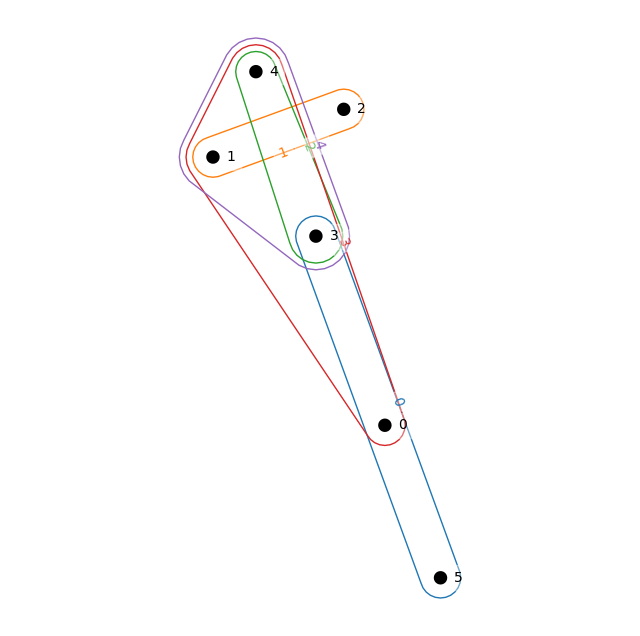

In [2]:
import hypernetx as hnx
import networkx as nx
import numpy as np

# Parâmetros do hipergrafo
num_nodes = 6
num_edges = 5

# Criar lista de nós
nodes = list(range(num_nodes))

# Criar lista de hiperarestas aleatórias
hyperedges = []
for _ in range(num_edges):
    # Escolhe um número aleatório de nós para cada hiperaresta
    edge_size = np.random.randint(2, num_nodes // 2 + 1)  # Garante que as hiperarestas tenham pelo menos 2 nós
    hyperedge = np.random.choice(nodes, edge_size, replace=False)  # Escolhe os nós aleatoriamente
    hyperedges.append(hyperedge)

# Criar o hipergrafo a partir das listas de nós e hiperarestas
H = hnx.Hypergraph(hyperedges)

# Visualizar o hipergrafo (opcional)
hnx.draw(H)

# Converter para o formato bipartido do NetworkX
G_nx = H.bipartite()

# Salvar o grafo bipartido em um arquivo
nx.write_edgelist(G_nx, "dados_hipergrafo.txt", delimiter="\t", data=False)

c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\lib\site-packages\hypernetx\classes\hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\lib\site-packages\hypernetx\classes\entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
c:\Users\marcos.aires\.conda\envs\Python38-PyTorch\lib\site-packages\hypernetx\classes\hypergraph.py:563

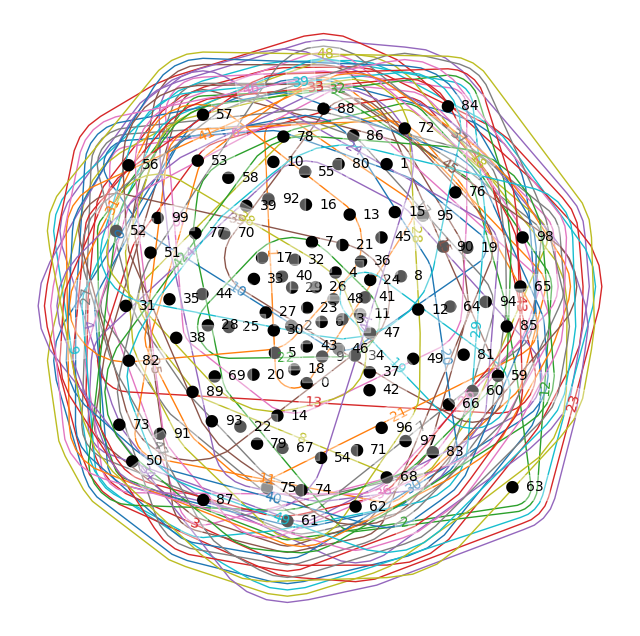

In [3]:
import hypernetx as hnx
import networkx as nx
import numpy as np

# Parâmetros do hipergrafo
num_nodes = 100
num_edges = 50

# Criar lista de nós
nodes = list(range(num_nodes))

# Criar lista de hiperarestas aleatórias
hyperedges = []
for _ in range(num_edges):
    # Escolhe um número aleatório de nós para cada hiperaresta
    edge_size = np.random.randint(2, num_nodes // 2 + 1)  # Garante que as hiperarestas tenham pelo menos 2 nós
    hyperedge = np.random.choice(nodes, edge_size, replace=False)  # Escolhe os nós aleatoriamente
    hyperedges.append(hyperedge)

# Criar o hipergrafo a partir das listas de nós e hiperarestas
H = hnx.Hypergraph(hyperedges)

# Visualizar o hipergrafo (opcional)
hnx.draw(H)

# Converter para o formato bipartido do NetworkX
G_nx = H.bipartite()

# Salvar o grafo bipartido em um arquivo
nx.write_edgelist(G_nx, "dados_hipergrafo.txt", delimiter="\t", data=False)


Um hipergrafo é uma generalização de um grafo, em que as arestas, chamadas de hiperarestas, podem conectar qualquer número de vértices (nós). Em um grafo normal, cada aresta conecta exatamente dois vértices.

Na imagem, os números podem ser interpretados como vértices (nós) e as curvas fechadas multicoloridas como hiperarestas. Cada hiperaresta engloba os vértices que ela conecta. Por exemplo, a hiperaresta vermelha conecta os vértices 12, 14, 15, 18, 21, 27, 28, 40, 42, 45 e 47.

Quanto a interpretação de hipergrafos, ela depende do contexto do problema aqui estão algumas possibilidades:

    Redes sociais: Os vértices podem representar pessoas e as hiperarestas podem representar grupos sociais, eventos ou interesses compartilhados.
    
    Coautoria científica: Os vértices podem representar autores e as hiperarestas podem representar artigos científicos em que colaboraram.

    Sistemas de recomendação: Os vértices podem representar usuários e itens, e as hiperarestas podem representar conjuntos de itens recomendados para um usuário ou conjuntos de usuários que receberam a mesma recomendação.

    Dados biológicos: Os vértices podem representar genes ou proteínas, e as hiperarestas podem representar vias biológicas ou complexos moleculares.

    A imagem mostra um hipergrafo com uma estrutura complexa, com muitas hiperarestas sobrepostas. Isso sugere que as relações entre os vértices são complexas e multifacetadas, o que é típico de muitos sistemas do mundo real.

Nome do Módulo: 
O nome do arquivo Python que contém a classe OverlappingCommunityDetector é community_detection.py. 

Portanto, para importar a classe, devemos usar from community_detection import OverlappingCommunityDetector.

In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from graph_bench_module import OverlappingCommunityDetector
import platform
import psutil

# Carregar o hipergrafo (substituir pelo seu arquivo)
G_nx = nx.read_edgelist("dados_hipergrafo.txt", delimiter="\t", create_using=nx.Graph())
H = hnx.Hypergraph(G_nx)

# Restrições de pares (exemplo)
must_link = [(1, 2), (3, 4)]
cannot_link = [(1, 3), (2, 4)]

# Parâmetros do algoritmo (ajuste conforme necessário)
num_communities = 5
other_params = {
    'resolution': 1.0,
    'must_link_weight': 1.0,
    'cannot_link_weight': 1.0
}

# Criar o detector de comunidades
detector = OverlappingCommunityDetector(H, must_link, cannot_link, num_communities, other_params)

# Informações sobre o ambiente de execução
print("Informações do sistema:")
print(f"  - Sistema operacional: {platform.system()} {platform.release()}")
print(f"  - Processador: {platform.processor()}")
print(f"  - Memória RAM total: {psutil.virtual_memory().total / (1024**3):.2f} GB")
print(f"  - Número de GPUs disponíveis: {torch.cuda.device_count() if torch.cuda.is_available() else 0}")

# Benchmarking
cpu_time = detector._benchmark_cpu()
gpu_time = detector._benchmark_gpu() if detector._has_gpu() else float('inf')

print("\nResultados do Benchmarking:")
print(f"  - Tempo de execução na CPU: {cpu_time:.2f} segundos")
print(f"  - Tempo de execução na GPU: {gpu_time:.2f} segundos")

# Detectar comunidades (escolhendo CPU ou GPU automaticamente)
communities = detector.detect_communities_benchmarking()

# Imprimir as comunidades encontradas
print(communities)


ModuleNotFoundError: No module named 'cupy'

In [ ]:
# Detectar comunidades com benchmarking
communities = detector.detect_communities_benchmarking()

# Imprimir as comunidades encontradas
print(communities)

In [29]:
# Visualizar as comunidades
pos = nx.spring_layout(H)  # Layout para visualização
colors = ['r', 'g', 'b', 'y', 'c']  # Cores para as comunidades

# Desenhar o hipergrafo
nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_edges(H, pos, alpha=0.5)

# Desenhar os nós com cores diferentes para cada comunidade
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(H, pos, nodelist=community, node_color=colors[i % len(colors)])

plt.show()

ModuleNotFoundError: No module named 'community_detection'